In [1]:
import torch
from transformers import (
    AutoModelForCausalLM, 
    AutoTokenizer, 
    Trainer,
    TrainingArguments,
    DataCollatorForLanguageModeling
)

/home/vatsal-patel/anaconda3/envs/unsloth_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Load Model and Tokenizer
model = AutoModelForCausalLM.from_pretrained(
    "Phi-3-mini-4k-instruct",
    device_map="auto",
    torch_dtype=torch.float16,  
    trust_remote_code=True,
#     attn_implementation="flash_attention_2"
)


Loading checkpoint shards: 100%|██████████████████| 2/2 [00:03<00:00,  1.98s/it]


In [6]:
torch.random.manual_seed(0)

In [8]:
tokenizer = AutoTokenizer.from_pretrained("Phi-3-mini-4k-instruct")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [10]:
# Example Value
value = "88.66"

# Tokenization
tokens = tokenizer.tokenize(value)
print(tokens)  


['▁', '8', '8', '.', '6', '6']


In [11]:
# Get Token IDs
token_ids = tokenizer.convert_tokens_to_ids(tokens)

# Get Embeddings
with torch.no_grad():
    input_ids = torch.tensor([token_ids])  # Batch of size 1
    outputs = model(input_ids, output_hidden_states=True)  

# Last Hidden State Embeddings (Choose the appropriate layer)
embeddings = outputs.hidden_states[-1]  

print(embeddings)

tensor([[[ 1.9958e-01,  7.9004e-01,  1.0020e+00,  ...,  6.9727e-01,
           2.7704e-04,  2.9468e-01],
         [ 2.0496e-01,  1.2393e+00,  1.3213e+00,  ..., -4.5990e-02,
          -4.7836e-03, -2.3157e-01],
         [-1.6876e-02,  1.1650e+00,  1.5293e+00,  ..., -1.7078e-01,
          -3.7158e-01,  3.8721e-01],
         [-4.7333e-02,  1.4395e+00,  8.3984e-01,  ..., -4.6021e-01,
          -3.3447e-01, -4.0802e-02],
         [ 5.5969e-02,  1.1650e+00,  6.4844e-01,  ..., -9.7998e-01,
           3.0347e-01,  1.9153e-01],
         [ 2.6709e-01,  8.3984e-01,  1.0244e+00,  ..., -1.2529e+00,
          -5.2588e-01,  6.3672e-01]]], dtype=torch.float16)


In [15]:
embeddings[0].shape

torch.Size([6, 3072])

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce embeddings to 2D
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings.squeeze().numpy())

# Plot
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
for i, token in enumerate(tokens):
    plt.annotate(token, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.show()


ValueError: perplexity must be less than n_samples

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce embeddings to 2D
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings.squeeze().numpy())

# Plot
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
for i, token in enumerate(tokens):
    plt.annotate(token, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.show()


ValueError: perplexity must be less than n_samples

In [23]:
all_embeddings

[array([ 0.4531,  0.5225, -1.071 , ...,  0.9604,  0.5156, -0.532 ],
       dtype=float16),
 array([-0.8447 ,  0.775  ,  0.8975 , ..., -1.108  , -0.00231,  0.2532 ],
       dtype=float16),
 array([-1.101  ,  0.1428 ,  0.921  , ..., -0.03345, -0.2615 ,  0.3904 ],
       dtype=float16),
 array([-1.097  ,  1.504  ,  1.772  , ...,  1.215  , -0.3027 , -0.07166],
       dtype=float16),
 array([-1.256 ,  1.302 ,  1.519 , ...,  0.7676, -0.2133, -0.1503],
       dtype=float16),
 array([-0.302 ,  0.392 ,  1.612 , ...,  0.55  , -0.5513, -0.3855],
       dtype=float16),
 array([-0.1659,  0.283 ,  0.788 , ...,  1.1455, -0.376 ,  1.04  ],
       dtype=float16),
 array([-0.936 ,  1.871 ,  1.632 , ..., -0.408 , -0.4387, -0.081 ],
       dtype=float16),
 array([-0.731 ,  1.256 ,  1.2   , ..., -0.57  , -0.4753,  0.4885],
       dtype=float16),
 array([-0.3628,  1.342 ,  1.423 , ..., -0.9   , -1.011 , -0.1133],
       dtype=float16),
 array([ 1.182 ,  1.814 , -0.997 , ...,  2.07  ,  0.2527,  0.4175],
    

In [24]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

# Example Gene and Value Pairs
gene_value_pairs = [
    ("TP53", "22.34"),
    ("BRCA1", "11.89"),
    ("EGFR", "7.65"),
]

# Tokenize and Get Embeddings
all_tokens = []
all_embeddings = []
for gene, value in gene_value_pairs:
    tokens = tokenizer.tokenize(gene) + tokenizer.tokenize(value)
    all_tokens.extend(tokens)

    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    with torch.no_grad():
        input_ids = torch.tensor([token_ids])
        outputs = model(input_ids, output_hidden_states=True)

    embeddings = outputs.hidden_states[-1].squeeze().numpy()  # Assuming you want the last hidden layer
    all_embeddings.append(embeddings)  # Append each embedding as a separate array

# Convert List of Arrays to a Single 2D Array
all_embeddings = np.concatenate(all_embeddings)  # Concatenate along axis=0

# Reduce Embeddings to 2D
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(all_embeddings)

# Plot
plt.figure(figsize=(10, 8))
for i, token in enumerate(all_tokens):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(token, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)
plt.title("t-SNE Visualization of Gene-Value Token Embeddings")
plt.show()


ValueError: perplexity must be less than n_samples

In [ ]:
# Custom Data Collator for Chat Format
class ChatDataCollatorForLanguageModeling(DataCollatorForLanguageModeling):
    def __call__(self, examples):
        # Concatenate chat messages within each example
        concatenated_examples = [
            "<|system|>" + "You are a helpful AI assistant." + "<|end|>" +
            "<|user|>" + ex["user"] + "<|end|>" +
            "<|assistant|>" + ex["assistant"]  
            for ex in examples
        ]
        
        # Tokenize the concatenated messages
        batch = self.tokenizer(
            concatenated_examples, 
            return_tensors="pt", 
            padding=True, 
            truncation=True,
            max_length=512,  # Adjust as needed
        )
        
        # Apply MLM (masking)
        special_tokens_mask = batch.attention_mask.clone()
        special_tokens_mask[
            (batch.input_ids == tokenizer.bos_token_id) |
            (batch.input_ids == tokenizer.eos_token_id) |
            (batch.input_ids == tokenizer.pad_token_id)
        ] = 1
        return super().__call__(
            batch["input_ids"], 
            batch["attention_mask"], 
            special_tokens_mask, 
            batch["labels"],
        )

In [ ]:





# Load and Prepare Dataset
from datasets import load_dataset

dataset = load_dataset("your_chat_dataset")
# Adjust according to your data format (assumed to have 'user' and 'assistant' columns)

tokenized_dataset = dataset.map(
    lambda example: tokenizer(example["user"], example["assistant"], truncation=True, max_length=512),
    batched=True,
    remove_columns=dataset["train"].column_names
)

# Set Up Trainer
data_collator = ChatDataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=0.15)  # 15% masking

training_args = TrainingArguments(
    output_dir="./phi-3-mini-mlm",
    evaluation_strategy="epoch",
    learning_rate=2e-5,   
    per_device_train_batch_size=16,
    gradient_accumulation_steps=4,
    num_train_epochs=3,
    weight_decay=0.01,
    fp16=True,
    save_strategy = "epoch",
    logging_dir = "./logs",
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    data_collator=data_collator
)

# Train!
trainer.train()


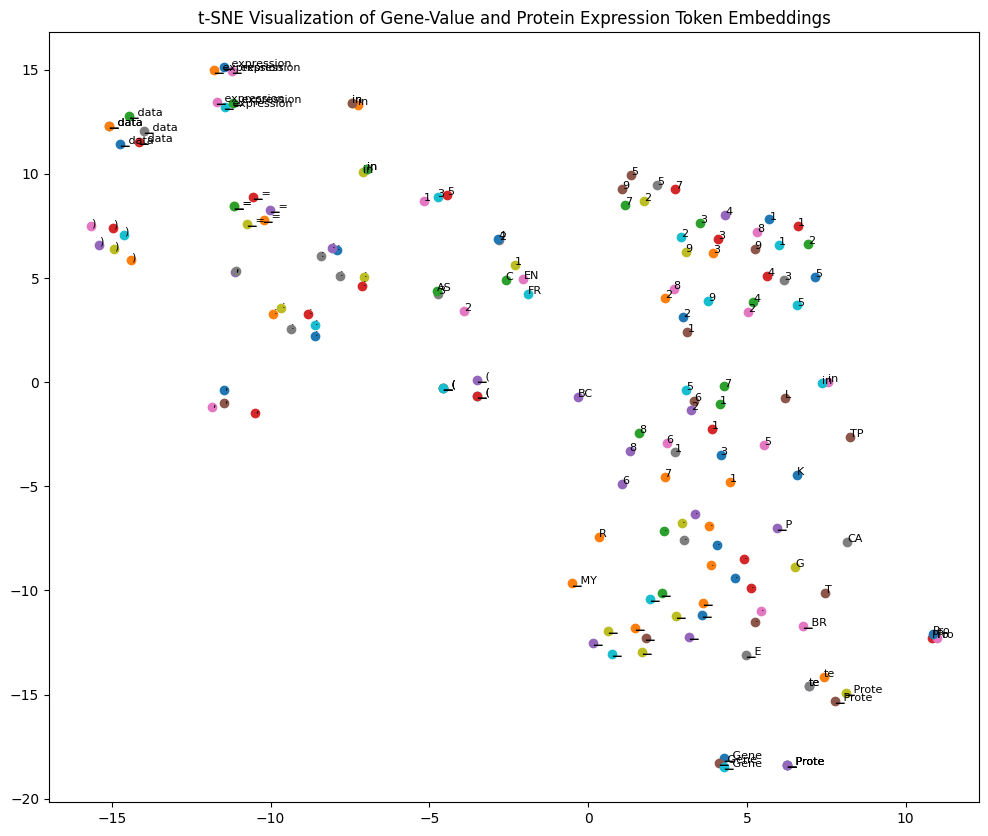

In [25]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

# Example Gene-Value Pairs and Corresponding Protein Expression
gene_value_pairs = [
    ({"TP53": "22.34", "BRCA1": "11.89", "EGFR": "7.65"}, {"Protein1": "55.21", "Protein2": "3.87"}),
    ({"KRAS": "18.92", "MYC": "6.12"}, {"Protein3": "44.98", "Protein4": "12.65"}),
    ({"BCL2": "9.33", "PTEN": "5.77"}, {"Protein5": "23.11"}),
    # ... Add more gene-value pairs and protein expression data as needed
]

# Tokenize and Get Embeddings
all_tokens = []
all_embeddings = []
for genes, proteins in gene_value_pairs:
    # Convert dictionaries to strings in the desired format
    gene_str = ", ".join([f"{gene}: {value}" for gene, value in genes.items()])
    protein_str = ", ".join([f"{protein}: {value}" for protein, value in proteins.items()])
    input_text = f"Gene expression data = ({gene_str})"
    target_text = f"Protein expression data = ({protein_str})"

    # Tokenize input and target texts
    input_tokens = tokenizer.tokenize(input_text)
    target_tokens = tokenizer.tokenize(target_text)

    all_tokens.extend(input_tokens)
    all_tokens.extend(target_tokens)
    
    # Get Embeddings for both input and target
    for tokens in [input_tokens, target_tokens]:
        token_ids = tokenizer.convert_tokens_to_ids(tokens)
        with torch.no_grad():
            input_ids = torch.tensor([token_ids])
            outputs = model(input_ids, output_hidden_states=True)
        embeddings = outputs.hidden_states[-1].squeeze().numpy()
        all_embeddings.append(embeddings)

# Convert List of Arrays to a Single 2D Array
all_embeddings = np.concatenate(all_embeddings)

# Reduce Embeddings to 2D
tsne = TSNE(n_components=2, random_state=0, perplexity=30)  # Adjust perplexity based on your sample size
embeddings_2d = tsne.fit_transform(all_embeddings)

# Plot
plt.figure(figsize=(12, 10))  # Increased figure size for better visualization
for i, token in enumerate(all_tokens):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(token, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)
plt.title("t-SNE Visualization of Gene-Value and Protein Expression Token Embeddings")
plt.show()


In [26]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Input Sentence
input_sentence = "Gene expression data = (TP53: 22.34, BRCA1: 11.89, EGFR: 7.65)"

# Tokenize Input
input_ids = tokenizer.encode(input_sentence, return_tensors="pt")

# Get Embeddings
with torch.no_grad():
    outputs = model(input_ids, output_hidden_states=True)

# Extract Embeddings from the Last Layer
token_embeddings = outputs.hidden_states[-1].squeeze(0)  # Remove batch dimension

# Average Pooling
sentence_embedding = torch.mean(token_embeddings, dim=0)
sentence_embedding = sentence_embedding.numpy()
print(f"Shape of sentence embedding: {sentence_embedding.shape}")


Shape of sentence embedding: (3072,)


In [27]:
# Tokenize Input (Ensure to add [CLS] and [SEP] tokens)
input_ids = tokenizer.encode(input_sentence, return_tensors="pt", add_special_tokens=True)

# Get Embeddings
with torch.no_grad():
    outputs = model(input_ids, output_hidden_states=True)

# CLS Token Embedding
sentence_embedding = outputs.hidden_states[-1][:, 0, :].squeeze(0).numpy()
print(f"Shape of sentence embedding (CLS): {sentence_embedding.shape}")


Shape of sentence embedding (CLS): (3072,)


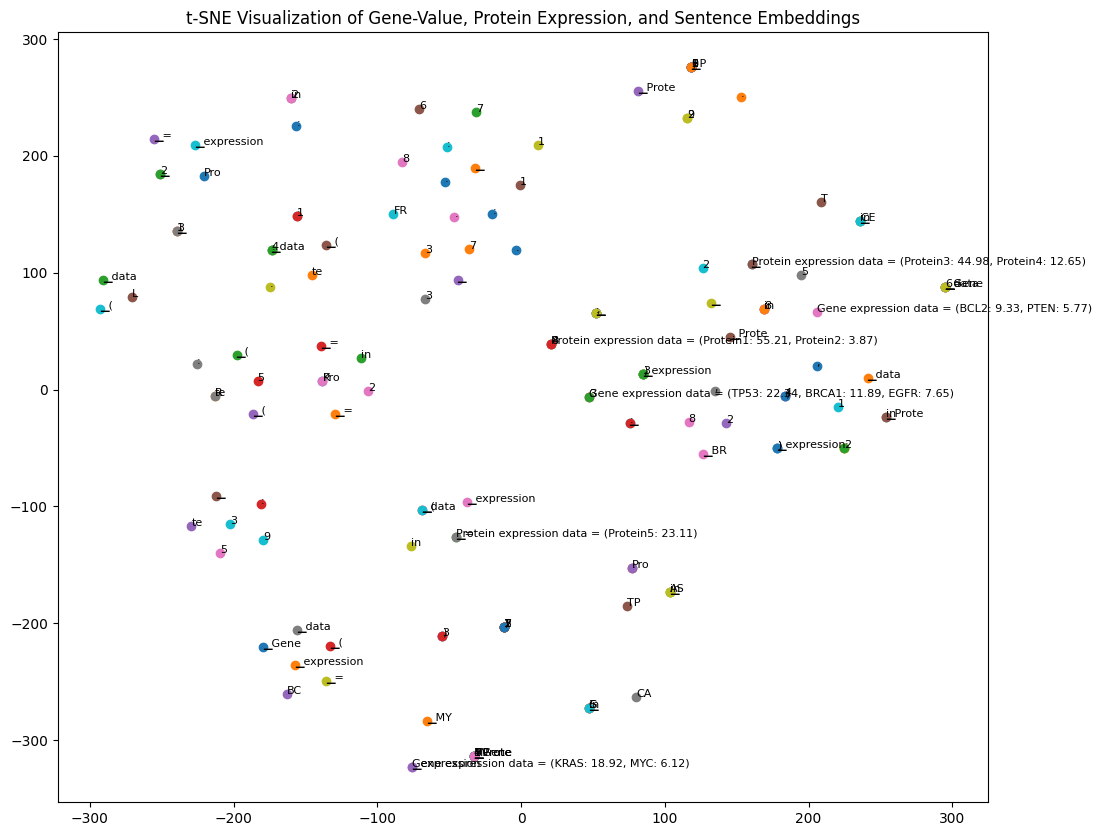

In [29]:
# Example Gene-Value Pairs and Corresponding Protein Expression
gene_value_pairs = [
    ({"TP53": "22.34", "BRCA1": "11.89", "EGFR": "7.65"}, {"Protein1": "55.21", "Protein2": "3.87"}),
    ({"KRAS": "18.92", "MYC": "6.12"}, {"Protein3": "44.98", "Protein4": "12.65"}),
    ({"BCL2": "9.33", "PTEN": "5.77"}, {"Protein5": "23.11"}),
]

# Tokenize, Get Embeddings, and Create Sentences
all_tokens = []
all_embeddings = []
sentences = []

for genes, proteins in gene_value_pairs:
    gene_str = ", ".join([f"{gene}: {value}" for gene, value in genes.items()])
    protein_str = ", ".join([f"{protein}: {value}" for protein, value in proteins.items()])
    input_sentence = f"Gene expression data = ({gene_str})"
    target_sentence = f"Protein expression data = ({protein_str})"
    sentences.append(input_sentence)
    sentences.append(target_sentence)

    # Get Sentence Embeddings (using average pooling)
    for sentence in [input_sentence, target_sentence]:
        input_ids = tokenizer.encode(sentence, return_tensors="pt")
        with torch.no_grad():
            outputs = model(input_ids, output_hidden_states=True)
        token_embeddings = outputs.hidden_states[-1].squeeze(0)
        sentence_embedding = torch.mean(token_embeddings, dim=0).numpy()
        all_embeddings.append(sentence_embedding)

    # Get Token Embeddings (if needed)
    all_tokens.extend(tokenizer.tokenize(input_sentence))
    all_tokens.extend(tokenizer.tokenize(target_sentence))

    # Correctly get token ids for both input and target sentences
    input_ids = tokenizer.encode(input_sentence, return_tensors="pt")
    target_ids = tokenizer.encode(target_sentence, return_tensors="pt")
    for tokens in [input_ids, target_ids]:
        for token_id in tokens[0]:
            with torch.no_grad():
                input_ids = torch.tensor([[token_id]])  # Wrap token_id in a list and convert to tensor
                outputs = model(input_ids, output_hidden_states=True)
            embedding = outputs.hidden_states[-1].squeeze().numpy()
            all_embeddings.append(embedding)


# Convert to NumPy Array
all_embeddings = np.array(all_embeddings)

# Reduce Embeddings to 2D
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
embeddings_2d = tsne.fit_transform(all_embeddings)

# Plot
plt.figure(figsize=(12, 10))

for i, (token, embedding) in enumerate(zip(all_tokens + sentences, embeddings_2d)):
    plt.scatter(embedding[0], embedding[1])
    plt.annotate(token, (embedding[0], embedding[1]), fontsize=8)

plt.title("t-SNE Visualization of Gene-Value, Protein Expression, and Sentence Embeddings")
plt.show()

In [30]:
import random
import pandas as pd

# List of Real Gene and Protein Names
genes = ["TP53", "BRCA1", "EGFR", "KRAS", "MYC", "BCL2", "PTEN"]
proteins = ["Albumin", "IgG", "Transferrin", "Haptoglobin", "Alpha-1-antitrypsin"]

def generate_expression_data(num_samples):
    data = []
    for _ in range(num_samples):
        gene_expr = {gene: round(random.uniform(5, 30), 2) for gene in genes}
        protein_expr = {protein: round(random.uniform(10, 100), 2) for protein in random.sample(proteins, k=3)}  # 3 random proteins per sample
        data.append((gene_expr, protein_expr))
    return data

# Generate 1000 samples
gene_value_pairs = generate_expression_data(1000)

# Convert to DataFrame for easier handling (Optional)
df = pd.DataFrame(gene_value_pairs, columns=["Gene Expression", "Protein Expression"])

# Save to CSV or JSON (Optional)
df.to_csv("gene_protein_expression.csv", index=False)


In [31]:
df

,Gene Expression,Protein Expression
0,"{'TP53': 13.14, 'BRCA1': 22.92, 'EGFR': 20.93,...","{'Haptoglobin': 65.01, 'Albumin': 83.22, 'Tran..."
1,"{'TP53': 19.16, 'BRCA1': 14.25, 'EGFR': 21.95,...","{'Transferrin': 17.2, 'Haptoglobin': 75.94, 'A..."
2,"{'TP53': 26.79, 'BRCA1': 21.59, 'EGFR': 25.13,...","{'Alpha-1-antitrypsin': 81.14, 'Haptoglobin': ..."
3,"{'TP53': 29.09, 'BRCA1': 8.45, 'EGFR': 10.44, ...","{'IgG': 68.22, 'Albumin': 20.94, 'Alpha-1-anti..."
4,"{'TP53': 12.85, 'BRCA1': 22.69, 'EGFR': 7.11, ...","{'IgG': 46.44, 'Transferrin': 45.79, 'Alpha-1-..."
...,...,...
995,"{'TP53': 26.86, 'BRCA1': 14.46, 'EGFR': 8.35, ...","{'IgG': 74.92, 'Transferrin': 70.23, 'Haptoglo..."
996,"{'TP53': 25.84, 'BRCA1': 18.47, 'EGFR': 11.83,...","{'Alpha-1-antitrypsin': 18.04, 'Haptoglobin': ..."
997,"{'TP53': 16.68, 'BRCA1': 18.0, 'EGFR': 16.72, ...","{'Haptoglobin': 27.27, 'IgG': 29.65, 'Albumin'..."
998,"{'TP53': 9.76, 'BRCA1': 10.51, 'EGFR': 7.59, '...","{'IgG': 11.96, 'Alpha-1-antitrypsin': 58.86, '..."


In [32]:
from datasets import load_dataset

dataset = load_dataset("csv", data_files="gene_protein_expression.csv")

# Custom Data Collator for MLM (Modified)
class GeneProteinDataCollatorForLanguageModeling(DataCollatorForLanguageModeling):
    def __call__(self, examples):
        # Convert dictionary to string representation
        examples = [
            f"Gene expression data = ({', '.join([f'{gene}: {value}' for gene, value in ex['Gene Expression'].items()])}) "
            f"Protein expression data = ({', '.join([f'{protein}: {value}' for protein, value in ex['Protein Expression'].items()])})"
            for ex in examples
        ]
        return super().__call__(examples, return_tensors="pt", padding=True, truncation=True, max_length=512)


# Prepare Tokenized Dataset
tokenized_dataset = dataset.map(
    lambda example: tokenizer(example["Gene Expression"], example["Protein Expression"], truncation=True, max_length=512),
    batched=True,
    remove_columns=dataset["train"].column_names
)

Generating train split: 1000 examples [00:00, 41145.64 examples/s]
Map: 100%|████████████████████████| 1000/1000 [00:00<00:00, 21714.93 examples/s]


In [33]:
# Set Up Trainer (Modified)
data_collator = GeneProteinDataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=0.15)  


ValueError: This tokenizer does not have a mask token which is necessary for masked language modeling. You should pass `mlm=False` to train on causal language modeling instead.